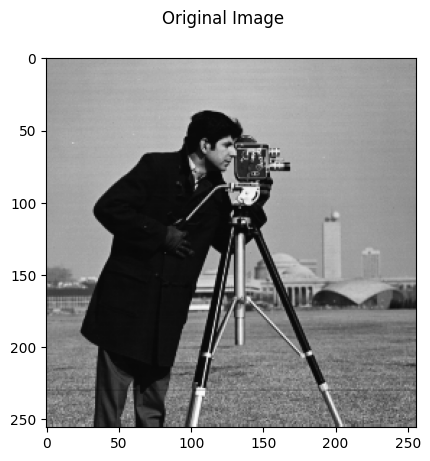

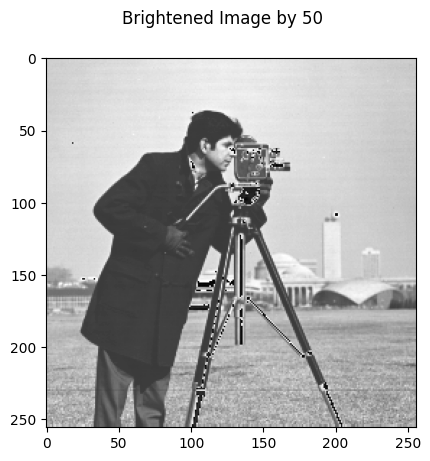

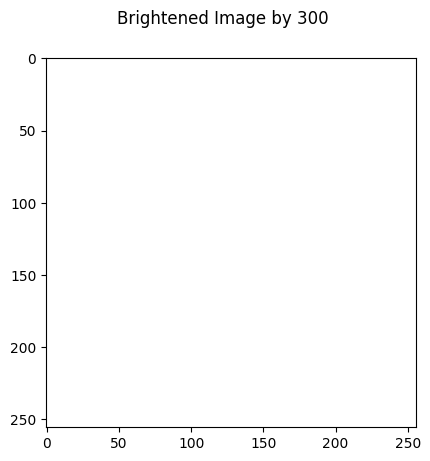

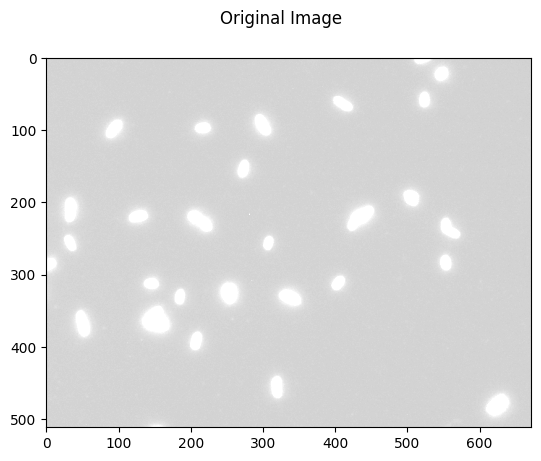

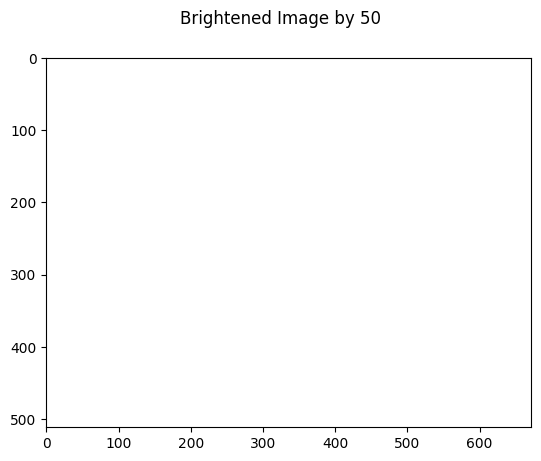

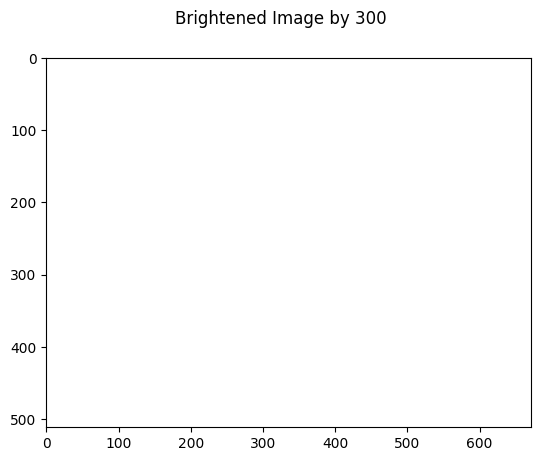

In [50]:
import numpy as np
from scipy import misc
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    return pic + brightness

# Read the image
cameraman_origin = imageio.imread('cameraman.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright = copy.deepcopy(cameraman_origin)

# Call imadd to perform enhancement
cameraman_bright = imadd(cameraman_bright,50)
cameraman_bright1 = imadd(cameraman_bright,300)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('Brightened Image by 50')
plt.imshow(cameraman_bright,cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(3)
fig_cam_bright.suptitle('Brightened Image by 300')
plt.imshow(cameraman_bright1,cmap='gray',vmin = 0, vmax = 255)


ecoImage = imageio.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
eco = copy.deepcopy(ecoImage)

# Call imadd to perform enhancement
eco_enhanced1 = imadd(eco,50)
eco_enhanced2 = imadd(eco,50)
# Show the results
fig_cam_origin = plt.figure(4)
fig_cam_origin.suptitle('Original Image')
plt.imshow(ecoImage, cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(5)
fig_cam_bright.suptitle('Brightened Image by 50')
plt.imshow(imadd(eco,50),cmap='gray',vmin = 0, vmax = 255)
fig_cam_bright = plt.figure(6)
fig_cam_bright.suptitle('Brightened Image by 300')
plt.imshow(imadd(eco,50),cmap='gray',vmin = 0, vmax = 255)
plt.show()











plt.show()

### Question 1  
256 distinct Grayscale values on interval [0,255]  

be saturated as every pixel will have a value over 255 so it will be completely white 

The quality (density of pixels) can not be enhanced due to simply brightening the image. The number of pixels remains the same. If there is a dark part of the image you wish to see better however, brightening the image could be used to accomplish this.


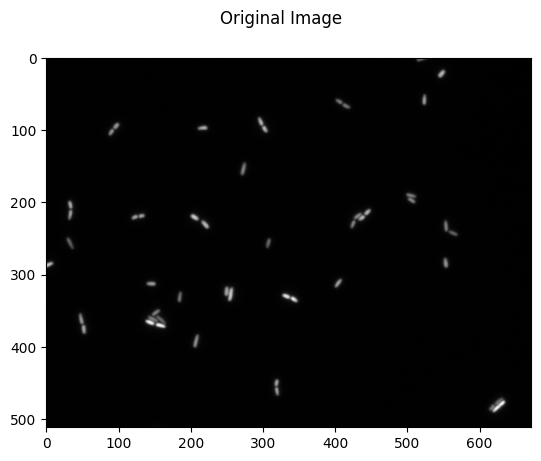

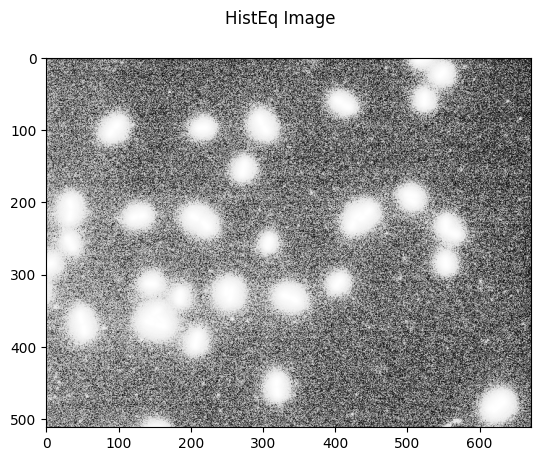

In [52]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import copy
%matplotlib inline


# Read the image
eco_origin = imageio.imread('eco.tif')

# Apply Histogram Equalization here!

eco_histeq = exposure.equalize_hist(eco_origin)
# eco_histeq = exposure.equalize_hist(eco_histeq)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray')
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.show()

### Question 2
Applying histogram equalization twice gives us the same values as doing it once so repeating it does not further enhance the image.

C:\Users\chazp\AppData\Local\Temp\ipykernel_76780\675763151.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten_origin = imageio.imread('kitten.png')


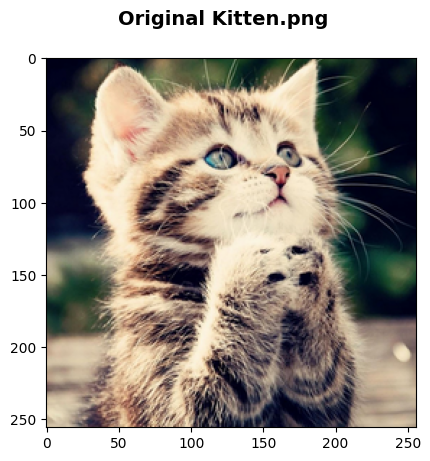

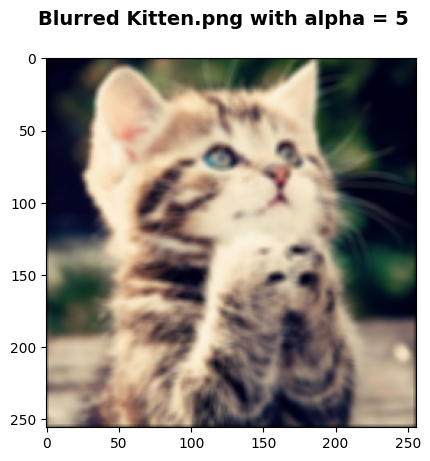

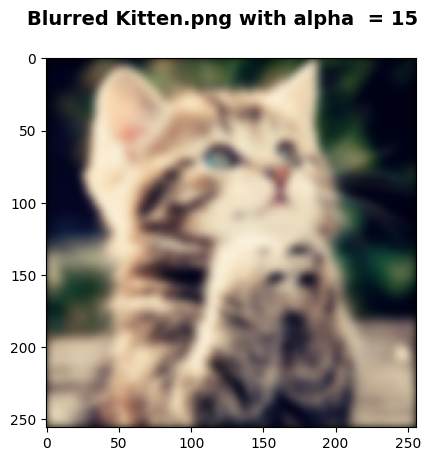

In [64]:
import numpy
from scipy import misc
from scipy import signal
import matplotlib.pyplot as plt

# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = numpy.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / numpy.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imageio.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)
kitten_blur1 = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel = gengaussian(5)
# Apply Convolution Here!
kitten_blur[:,:,0] = signal.convolve2d(kitten_blur[:,:,0],kernel,mode = "same")
kitten_blur[:,:,1] = signal.convolve2d(kitten_blur[:,:,1],kernel,mode = "same")
kitten_blur[:,:,2] = signal.convolve2d(kitten_blur[:,:,2],kernel,mode = "same")

kernel1 = gengaussian(15)

kitten_blur1[:,:,0] = signal.convolve2d(kitten_blur1[:,:,0],kernel1,mode = "same")
kitten_blur1[:,:,1] = signal.convolve2d(kitten_blur1[:,:,1],kernel1,mode = "same")
kitten_blur1[:,:,2] = signal.convolve2d(kitten_blur1[:,:,2],kernel1,mode = "same")
# Display Results
fig_kitten_origin = plt.figure(1)
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)

fig_kitten_blur = plt.figure(2)
fig_kitten_blur.suptitle('Blurred Kitten.png with alpha = 5', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)

fig_kitten_blur = plt.figure(3)
fig_kitten_blur.suptitle('Blurred Kitten.png with alpha  = 15', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur1,vmin = 0, vmax = 255)
plt.show()

### Question 3 answer
We see the kitten is more blurred when alpha is larger